# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud
!pip install folium


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

### Load data


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Personal/Zomato/zomato_restaurants_in_India.csv")

#### Top 5 Rows of Data

In [5]:
data.head(7)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1


#### Last 5 Rows of Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


#### Random 5 Rows of the Data

In [8]:
data.sample(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
78013,90199,KFC,['Quick Bites'],https://www.zomato.com/hyderabad/kfc-karkhana-...,"B1, Karkhana Road, Karkhana, Secunderabad",Secunderabad,6,Karkhana,17.456773,78.499323,...,1,Rs.,"['Dinner', 'Cash', 'Delivery', 'Credit Card', ...",4.0,Very Good,900,72,0.0,1,-1
49270,18732381,Zio Restaurant,['Casual Dining'],https://www.zomato.com/cuttack/zio-restaurant-...,"Ground Floor, Hotel Lords, Siba Bazaar, Cuttack",Cuttack,11289,Siba Bazaar,20.466052,85.876778,...,3,Rs.,"['Cash', 'Takeaway Available', 'Dinner', 'Deli...",3.3,Average,56,11,0.0,-1,-1
61979,18746419,Sherpa Bar & Restaurant,[],https://www.zomato.com/gangtok/sherpa-bar-rest...,"Denzong Cinema Road, Arithang, Gangtok",Gangtok,15,Arithang,27.326750,88.611693,...,1,Rs.,[],0.0,Not rated,0,3,0.0,-1,-1
116726,18823810,Santa Delivers,[],https://www.zomato.com/kolkata/santa-delivers-...,"325, Rafi Ahmed Kidwai Road, Baguihati, Kolkata",Kolkata,2,Baguihati,22.613997,88.418971,...,2,Rs.,"['Dinner', 'Delivery', 'Takeaway Available', '...",4.1,Very Good,60,65,0.0,1,-1
199457,18041430,1559 AD,['Fine Dining'],https://www.zomato.com/udaipur/1559-ad-fateh-s...,"PP Singhal Marg, Near Fateh Sagar Lake, Fateh ...",Udaipur,11054,Fateh Sagar,24.592751,73.681323,...,4,Rs.,"['Credit Card', 'Takeaway Available', 'Cash', ...",4.2,Very Good,319,300,0.0,-1,-1


In [9]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [10]:
data.currency.unique()

array(['Rs.'], dtype=object)

In [11]:
data[data['city']=="Indore"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
79621,18625117,Namo Sandwich,['Quick Bites'],https://www.zomato.com/indore/namo-sandwich-1-...,"610, Narendra Tiwari Marg, Usha Nagar, Sudama ...",Indore,14,Sudama Nagar,22.696331,75.834857,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.3,Very Good,860,244,0.0,-1,-1
79622,1400096,Bake N Shake,['Café'],https://www.zomato.com/indore/bake-n-shake-vij...,"Shop 3 & 4, Giriraj Grande, Satya Sai Square, ...",Indore,14,"BCM Heights, Vijay Nagar",22.755705,75.895287,...,2,Rs.,"['Dinner', 'Mall Parking', 'Delivery', 'Credit...",4.2,Very Good,683,357,0.0,-1,-1
79623,1400382,Shree Gurukripa,['Casual Dining'],https://www.zomato.com/indore/shree-gurukripa-...,"13, Choti Gwaltoli, Sarwate Bus Stand, Indore",Indore,14,Sarwate Bus Stand,22.714090,75.868851,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.3,Very Good,2030,72,0.0,-1,-1
79624,1400056,Nafees Restaurant,['Casual Dining'],https://www.zomato.com/indore/nafees-restauran...,"30-B, Apollo Avenue, Opposite Palasia Thana",Indore,14,Old Palasia,22.725712,75.887757,...,3,Rs.,"['Credit Card', 'No Alcohol Available', 'Dinne...",4.3,Very Good,2987,336,0.0,-1,-1
79625,1400365,Hotel Guru Kripa,['Quick Bites'],https://www.zomato.com/indore/hotel-guru-kripa...,"Mahatma Gandhi Road, Murai Mohalla, Chhawni, S...",Indore,14,Sarwate Bus Stand,22.714086,75.868846,...,2,Rs.,"['Dinner', 'Cash', 'Breakfast', 'Lunch', 'Take...",4.3,Very Good,3441,151,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82574,18607182,One Asia - Indore Marriott Hotel,['Fine Dining'],https://www.zomato.com/indore/one-asia-indore-...,"H-2, Scheme 54, Meghdoot Garden, Vijay Nagar, ...",Indore,14,"Indore Marriott Hotel, Vijay Nagar",22.752747,75.883751,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.5,Terbaik,320,128,0.0,-1,-1
82575,18664400,Constellation - Hotel WOW,['Fine Dining'],https://www.zomato.com/indore/constellation-ho...,"Hotel Wow, Plot 106, PU 3, Rasoma Square, A.B....",Indore,14,"Hotel Wow, Vijay Nagar",22.749182,75.895365,...,4,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Debit Card'...",4.2,Very Good,285,174,0.0,-1,-1
82576,1400554,Ni Hao - Radisson Blu Hotel,['Fine Dining'],https://www.zomato.com/indore/ni-hao-radisson-...,"Radisson Blu Hotel, 12, Scheme 94C, Ring Road,...",Indore,14,"Radisson Blu Hotel, Vijay Nagar",22.750030,75.903471,...,4,Rs.,"['Lunch', 'Takeaway Available', 'Debit Card', ...",4.6,Terbaik,248,183,0.0,-1,-1
82577,1400493,Indiya Oye - Radisson Blu Hotel,['Fine Dining'],https://www.zomato.com/indore/indiya-oye-radis...,"Radisson Blu Hotel, 12, Scheme 94 C, Ring Road...",Indore,14,"Radisson Blu Hotel, Vijay Nagar",22.750035,75.903480,...,4,Rs.,"['Delivery', 'Credit Card', 'Dinner', 'Cash', ...",4.3,Sangat Baik,200,265,0.0,-1,-1


In [12]:
data[data['city']=='Mumbai']

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


#### Check no. of Rows and Column

In [13]:
data.shape

(211944, 26)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [15]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [16]:
data['city'].value_counts()

city
Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: count, Length: 99, dtype: int64

#### Removing Duplicate Rows on the basis of Resturant ID ('res_id')

In [17]:
data.drop_duplicates(['res_id'],keep='first',inplace=True)
data.shape

(55568, 26)

# EDA

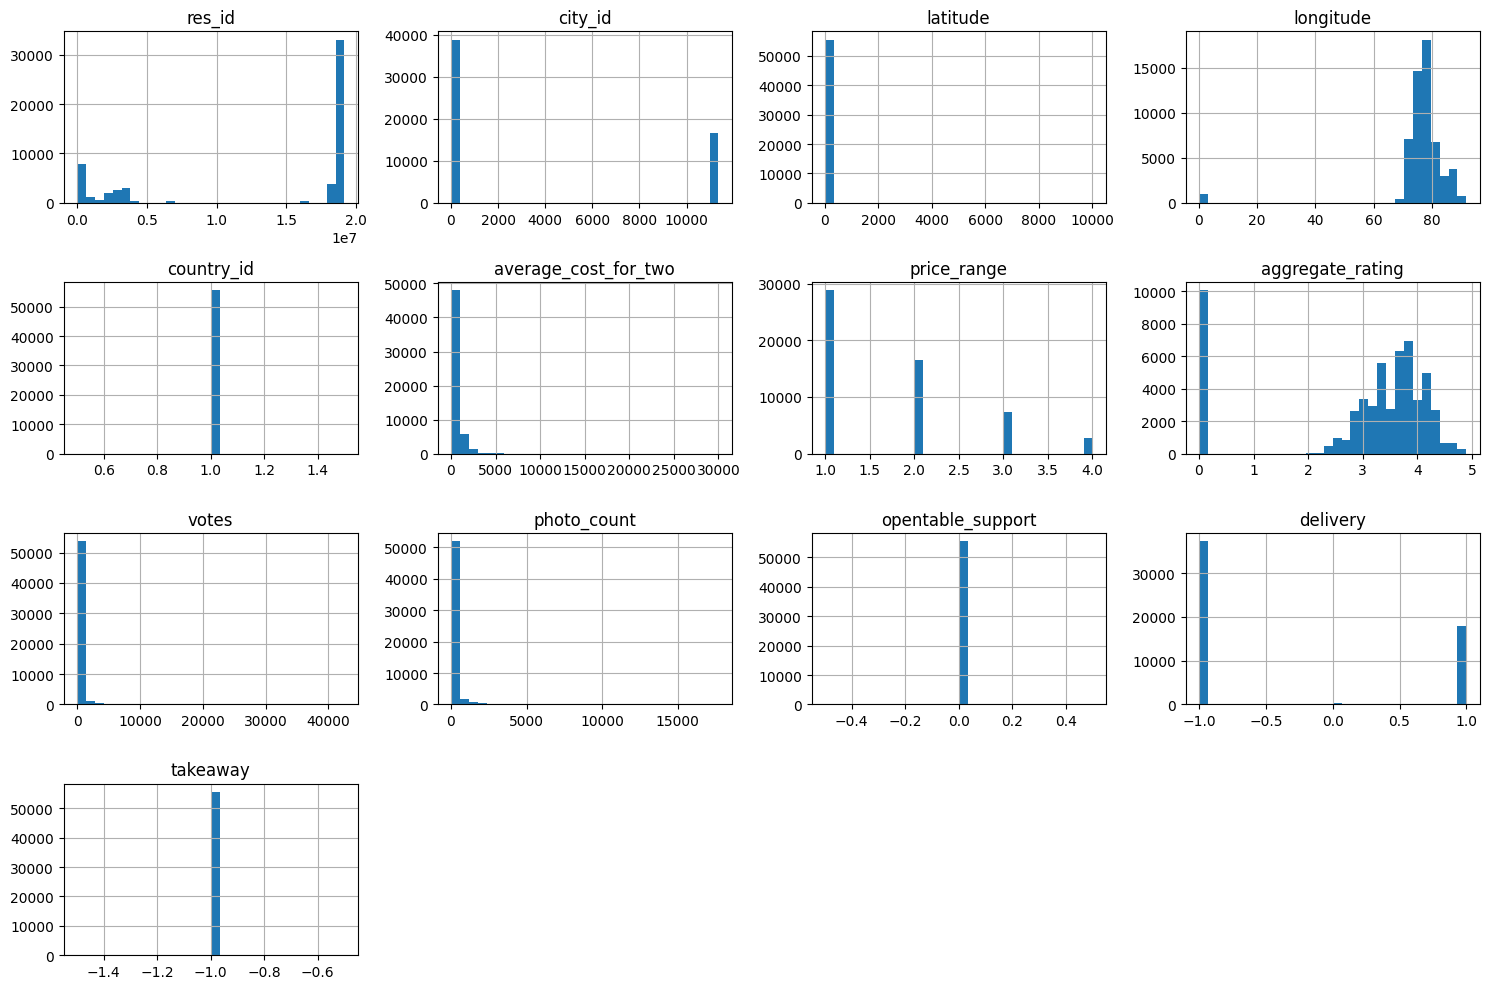

In [18]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

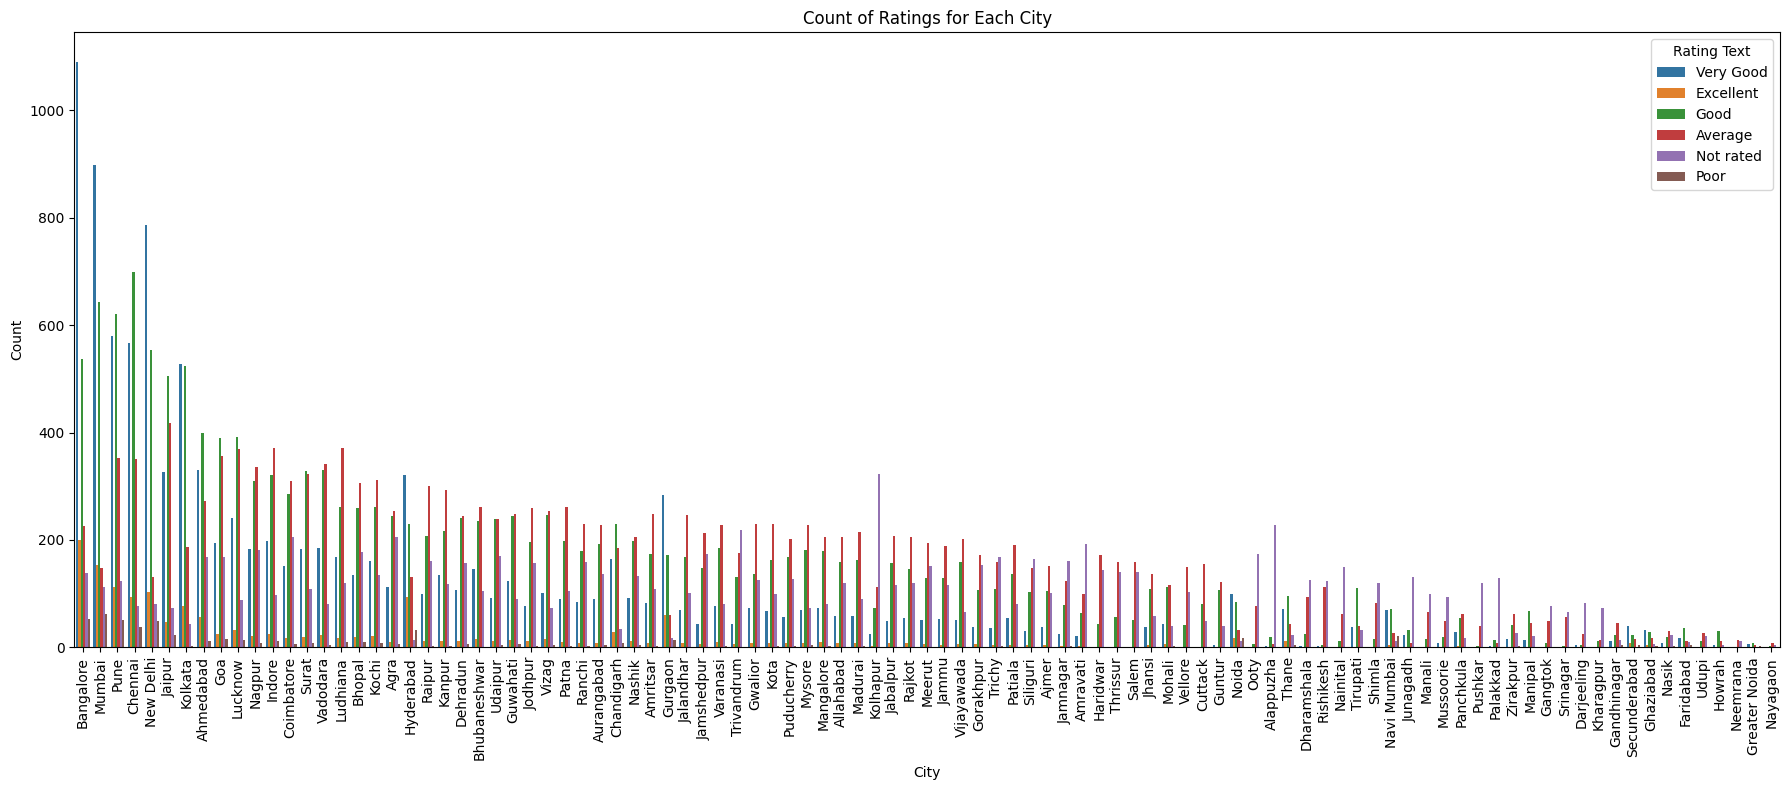

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter rating_text column to include only specified classes
selected_rating_classes = ['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor']
zomato_data_filtered = data[data['rating_text'].isin(selected_rating_classes)]

# Plotting the count of ratings for each city
plt.figure(figsize=(18, 8))
sns.countplot(data=zomato_data_filtered, x='city', hue='rating_text', order=zomato_data_filtered['city'].value_counts().index)
plt.title('Count of Ratings for Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Rating Text')
plt.tight_layout()
plt.show()


In [20]:
# waste_col = ['url','address','city_id','locality','latitude','longitude','zipcode','country_id','country_id','currency','locality_verbose','timings']
# data = data.drop(waste_col, axis=1)

In [21]:
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,...,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,...,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


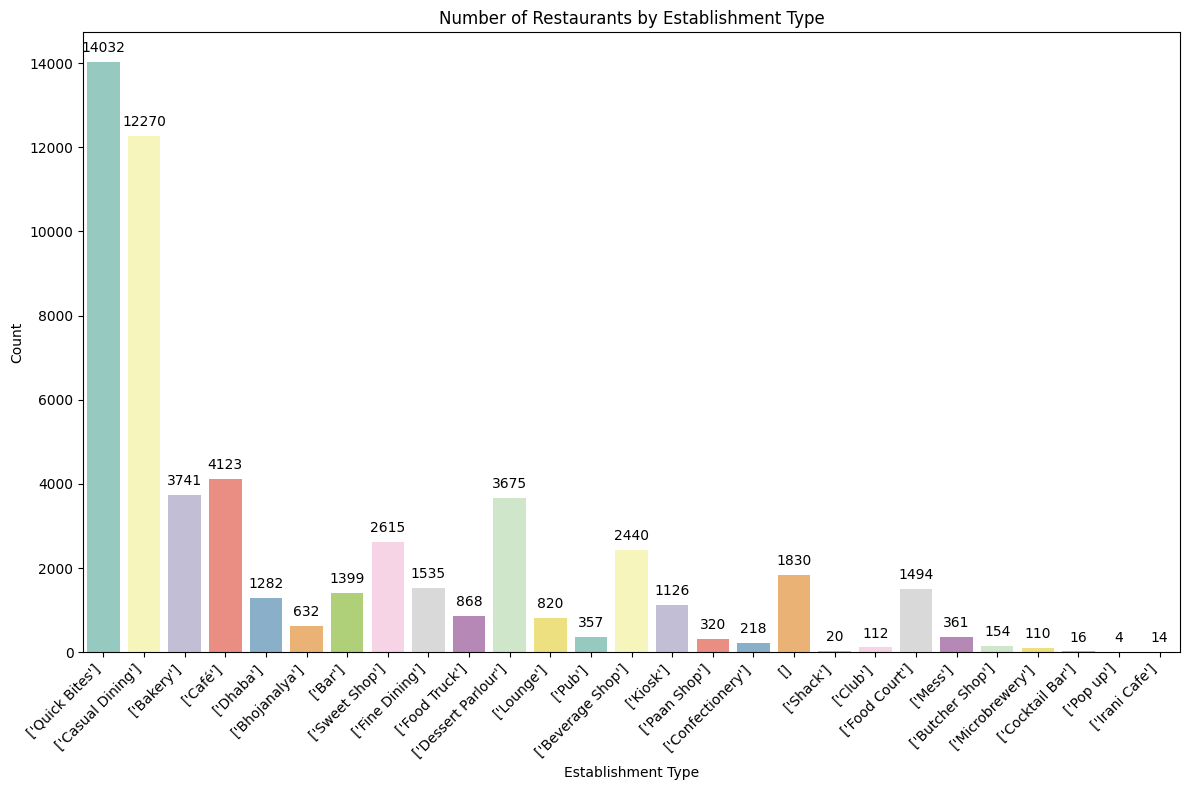

In [22]:
# Counting the number of restaurants for each establishment type
establishment_counts = data['establishment'].value_counts()

# Plotting the number of restaurants by establishment type
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='establishment', palette='Set3')

# Adding text labels for count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Number of Restaurants by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

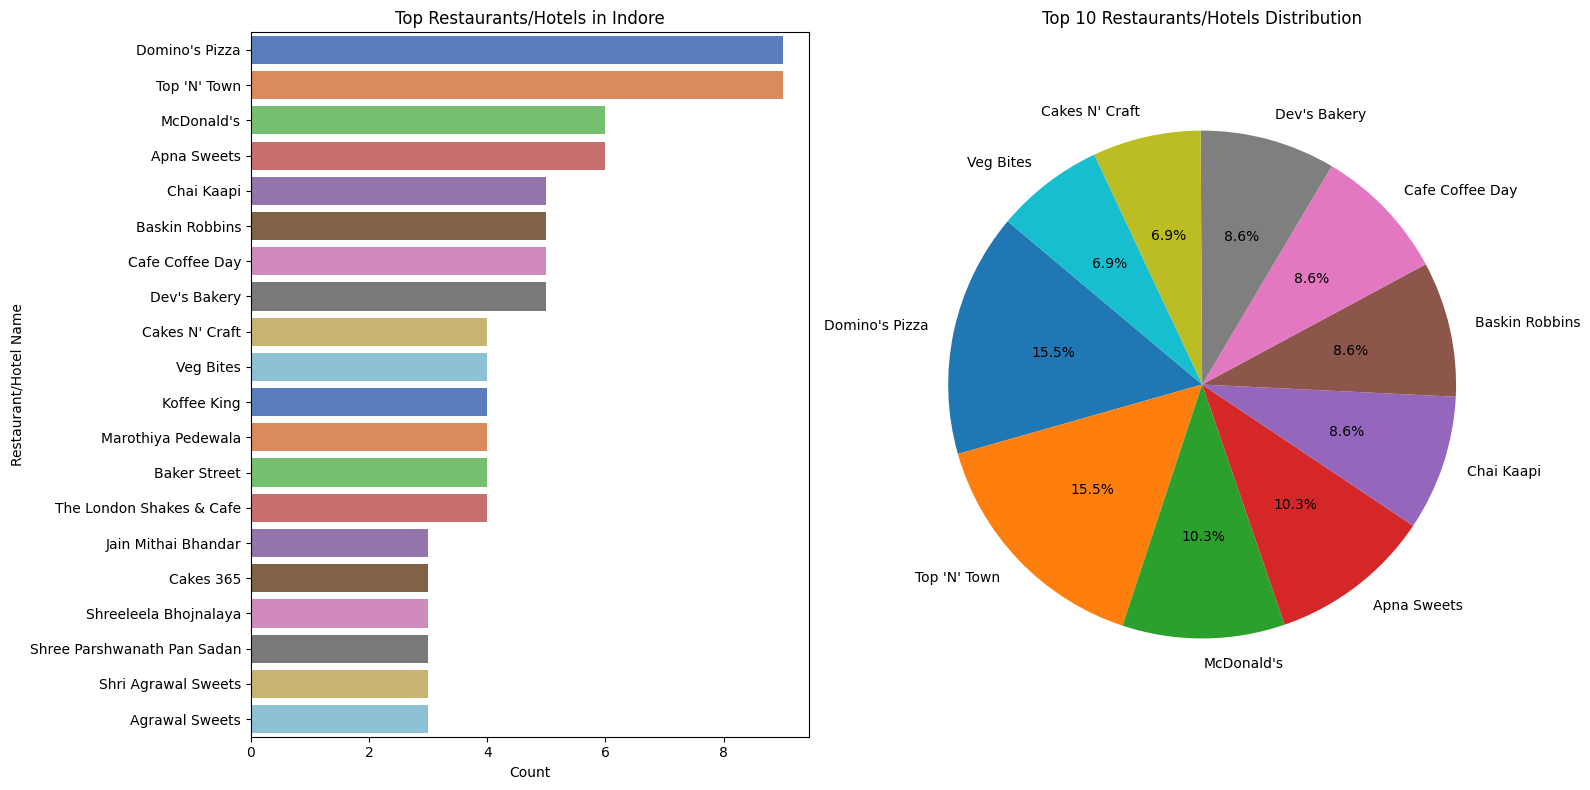

In [23]:
# Filter data for Indore city
indore_data = data[data['city'] == 'Indore']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plotting the count of each restaurant/hotel name in Indore (bar plot)
sns.countplot(data=indore_data, y='name', order=indore_data['name'].value_counts().iloc[:20].index, palette='muted', ax=axes[0])
axes[0].set_title('Top Restaurants/Hotels in Indore')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Restaurant/Hotel Name')

# Plotting the count of each restaurant/hotel name in Indore (pie chart)
name_counts = indore_data['name'].value_counts().iloc[:10]
axes[1].pie(name_counts, labels=name_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Top 10 Restaurants/Hotels Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

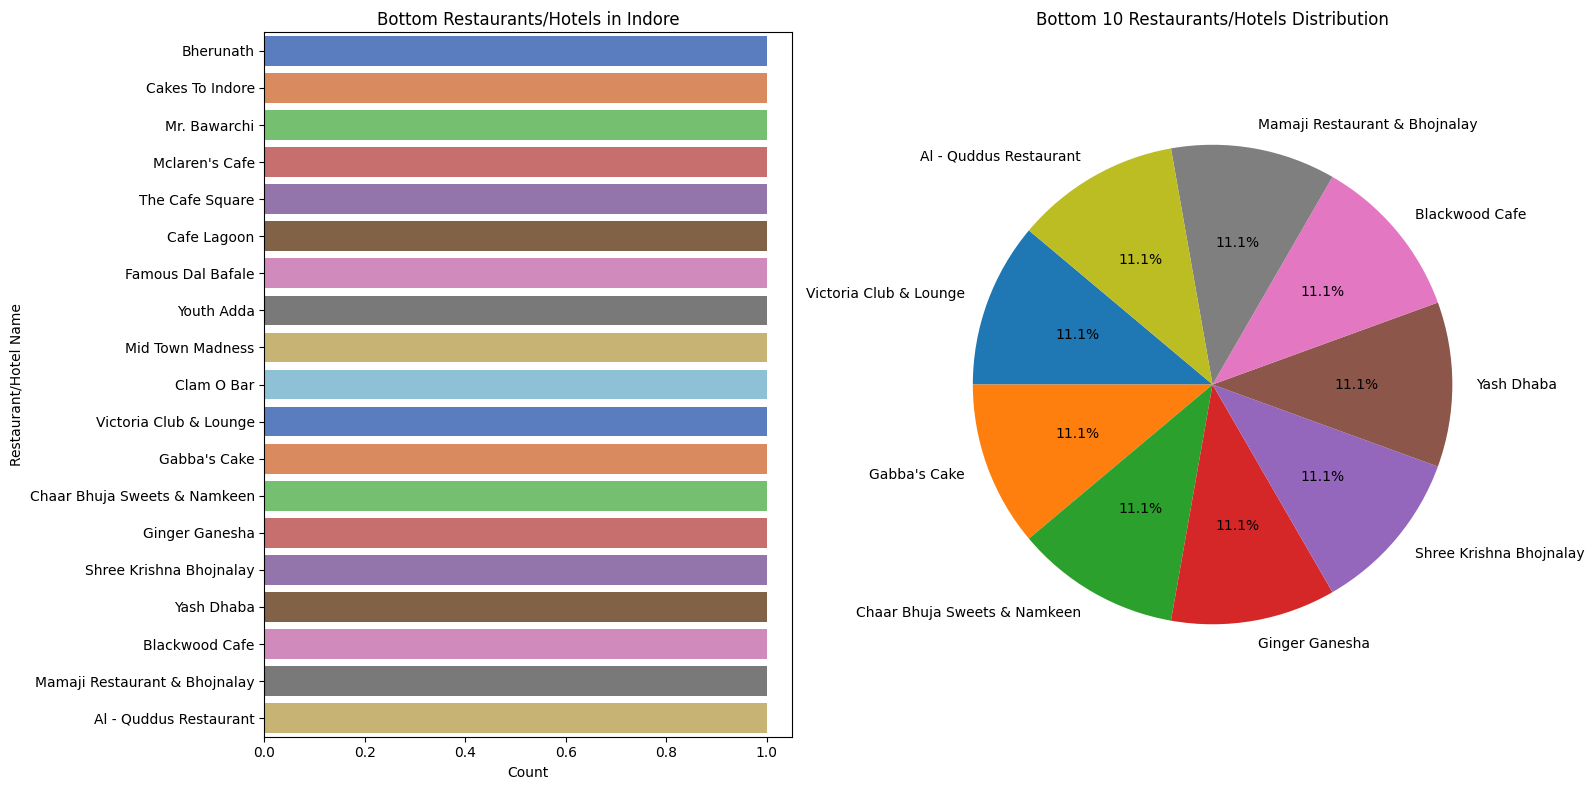

In [24]:
# Filter data for Indore city
indore_data = data[data['city'] == 'Indore']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plotting the count of each restaurant/hotel name in Indore (bar plot)
sns.countplot(data=indore_data, y='name', order=indore_data['name'].value_counts().iloc[-20:-1].index, palette='muted', ax=axes[0])
axes[0].set_title('Bottom Restaurants/Hotels in Indore')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Restaurant/Hotel Name')

# Plotting the count of each restaurant/hotel name in Indore (pie chart)
name_counts = indore_data['name'].value_counts().iloc[-10:-1]
axes[1].pie(name_counts, labels=name_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Bottom 10 Restaurants/Hotels Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

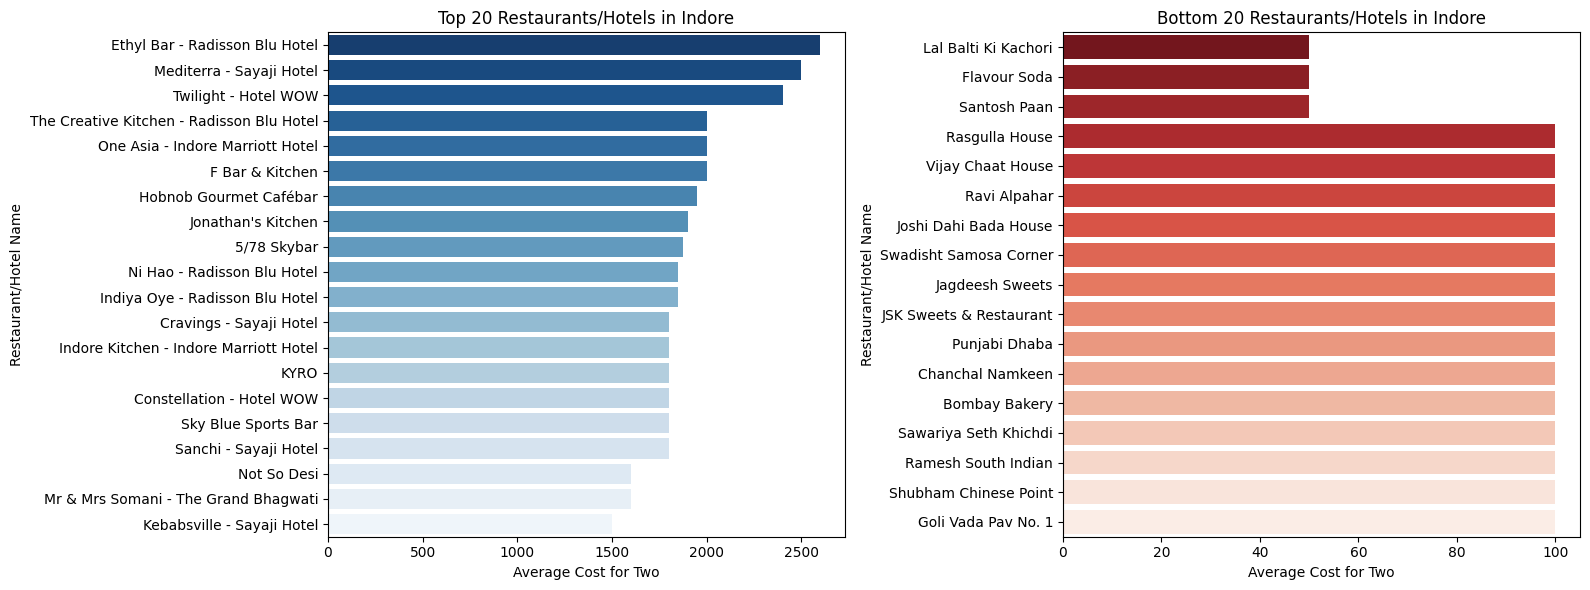

In [25]:
# Filter data for Indore city
indore_data = data[data['city'] == 'Indore']

# Get the top 20 and bottom 20 restaurants/hotels based on average cost for two
top_20 = indore_data.nlargest(20, 'average_cost_for_two')
bottom_20 = indore_data.nsmallest(20, 'average_cost_for_two')

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting the average cost for two for the top 20 Restaurants/Hotels
sns.barplot(data=top_20, y='name', x='average_cost_for_two', palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 20 Restaurants/Hotels in Indore')
axes[0].set_xlabel('Average Cost for Two')
axes[0].set_ylabel('Restaurant/Hotel Name')

# Plotting the average cost for two for the bottom 20 Restaurants/Hotels
sns.barplot(data=bottom_20, y='name', x='average_cost_for_two', palette='Reds_r', ax=axes[1])
axes[1].set_title('Bottom 20 Restaurants/Hotels in Indore')
axes[1].set_xlabel('Average Cost for Two')
axes[1].set_ylabel('Restaurant/Hotel Name')

plt.tight_layout()
plt.show()

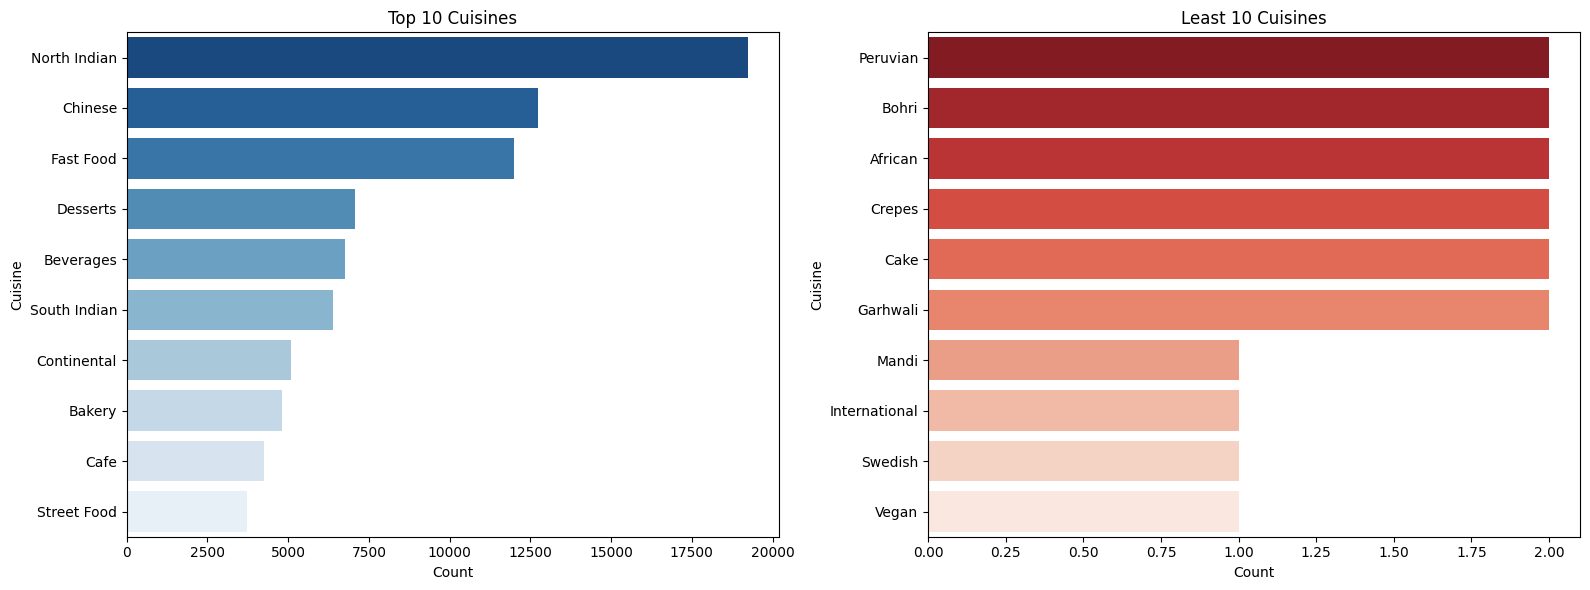

In [26]:
# Extracting individual cuisines and counting their frequencies
cuisine_list = data['cuisines'].dropna().str.split(', ')
cuisine_counts = Counter(cuisine for cuisines in cuisine_list for cuisine in cuisines)

# Converting to a DataFrame for easier plotting
cuisine_df = pd.DataFrame(cuisine_counts.most_common(), columns=['Cuisine', 'Count'])

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting the top 10 cuisines
sns.barplot(x='Count', y='Cuisine', data=cuisine_df.head(10), ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 10 Cuisines')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Cuisine')

# Plotting the least 10 cuisines
sns.barplot(x='Count', y='Cuisine', data=cuisine_df.tail(10), ax=axes[1], palette='Reds_r')
axes[1].set_title('Least 10 Cuisines')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Cuisine')

plt.tight_layout()
plt.show()


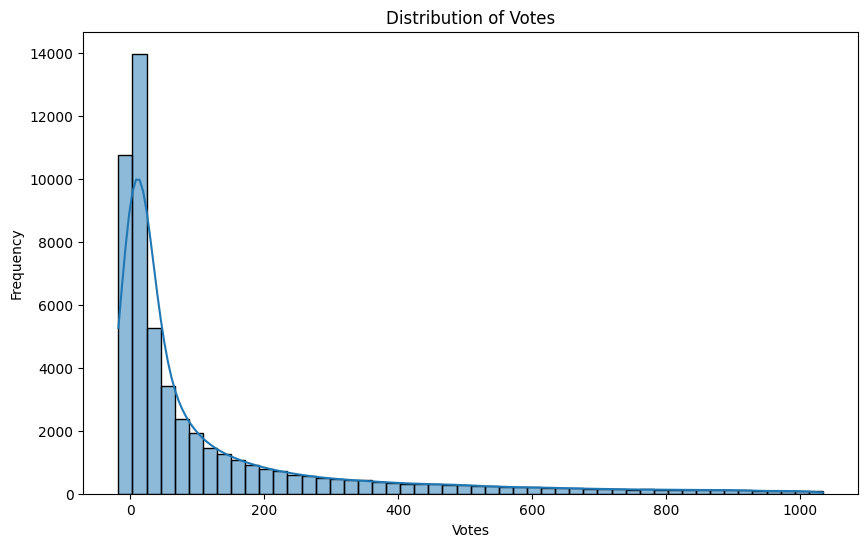

In [27]:
# Distribution of Votes
plt.figure(figsize=(10, 6))
sns.histplot(data[data['votes'] <= data['votes'].quantile(0.95)]['votes'], bins=50, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

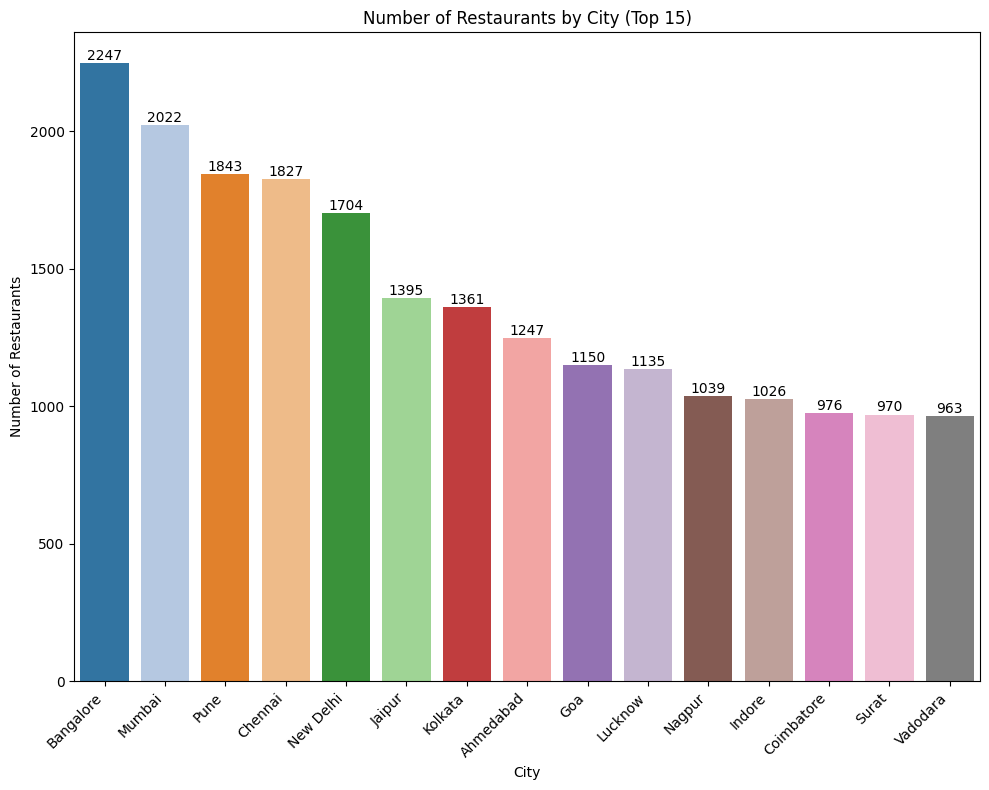

In [28]:
# Counting the number of restaurants in each city
restaurant_counts = data['city'].value_counts().head(15)

# Plotting the number of restaurants by city vertically
plt.figure(figsize=(10, 8))
sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, palette='tab20')

# Adding text labels for total count on top of each bar
for i, count in enumerate(restaurant_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Number of Restaurants by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

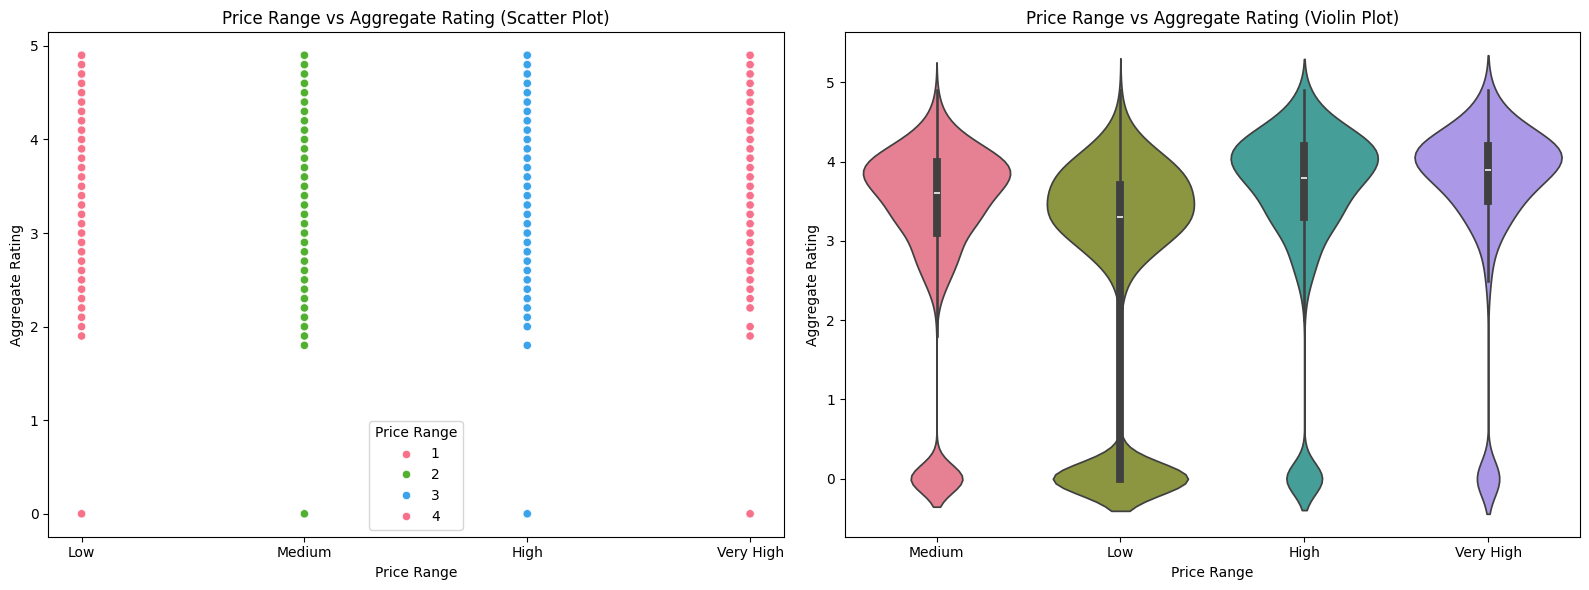

In [29]:
# Filter out rows with missing values in 'price_range' or 'aggregate_rating'
filtered_data = data.dropna(subset=['price_range', 'aggregate_rating'])

# Mapping numerical price range to categorical labels
price_labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
filtered_data['price_range_label'] = filtered_data['price_range'].map(price_labels)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting 'price_range' with respect to 'aggregate_rating' using a scatter plot
sns.scatterplot(x='price_range', y='aggregate_rating', data=filtered_data, hue='price_range', palette='husl', ax=axes[0])
axes[0].set_title('Price Range vs Aggregate Rating (Scatter Plot)')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Aggregate Rating')
axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
axes[0].legend(title='Price Range')

# Plotting 'price_range' with respect to 'aggregate_rating' using a violin plot
sns.violinplot(x='price_range_label', y='aggregate_rating', data=filtered_data, palette='husl', ax=axes[1])
axes[1].set_title('Price Range vs Aggregate Rating (Violin Plot)')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Aggregate Rating')

plt.tight_layout()
plt.show()

In [30]:
data.nunique()

res_id                  55568
name                    41100
establishment              27
url                     55568
address                 50657
city                       99
city_id                    83
locality                 3731
latitude                53362
longitude               53326
zipcode                  1311
country_id                  1
locality_verbose         3910
cuisines                 9382
timings                  7740
average_cost_for_two      145
price_range                 4
currency                    1
highlights              31228
aggregate_rating           33
rating_text                33
votes                    2644
photo_count              2457
opentable_support           1
delivery                    3
takeaway                    1
dtype: int64

In [31]:
data.describe().astype(int)

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568,55568,55568,55568,55568,55568,55568,55568,55568,55568,55556,55568,55568
mean,13136940,3409,21,76,1,528,1,2,223,160,0,0,-1
std,8105959,5174,42,10,0,595,0,1,618,586,0,0,0
min,50,1,0,0,1,0,1,0,-18,0,0,-1,-1
25%,3001351,8,16,74,1,200,1,2,6,1,0,-1,-1
50%,18692679,26,22,77,1,350,1,3,35,10,0,-1,-1
75%,18872615,11294,26,79,1,600,2,3,175,69,0,1,-1
max,19159790,11354,9999,91,1,30000,4,4,42539,17702,0,1,-1


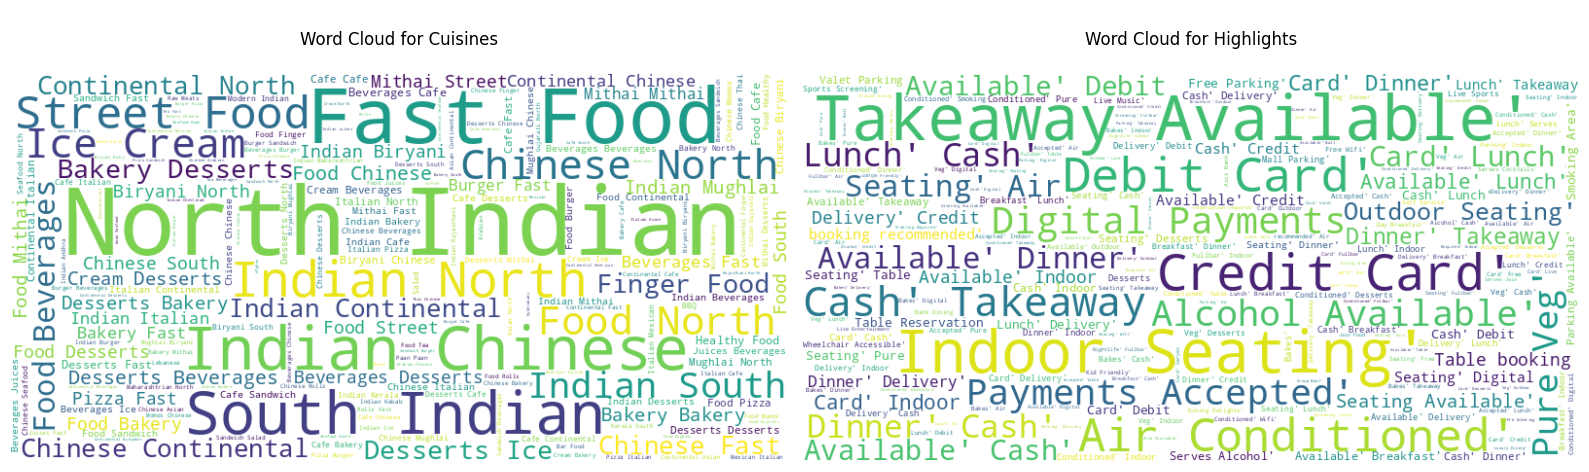

In [32]:
# Concatenate all cuisines or highlights into a single string
cuisine_text = ' '.join(data['cuisines'].dropna())
highlight_text = ' '.join(data['highlights'].dropna())

# Generate word clouds
cuisine_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)
highlight_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(highlight_text)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(cuisine_wordcloud, interpolation='bilinear')
plt.title('\nWord Cloud for Cuisines\n')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highlight_wordcloud, interpolation='bilinear')
plt.title('\nWord Cloud for Highlights\n')
plt.axis('off')

plt.tight_layout()
plt.show()

In [33]:
data.head(2)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1


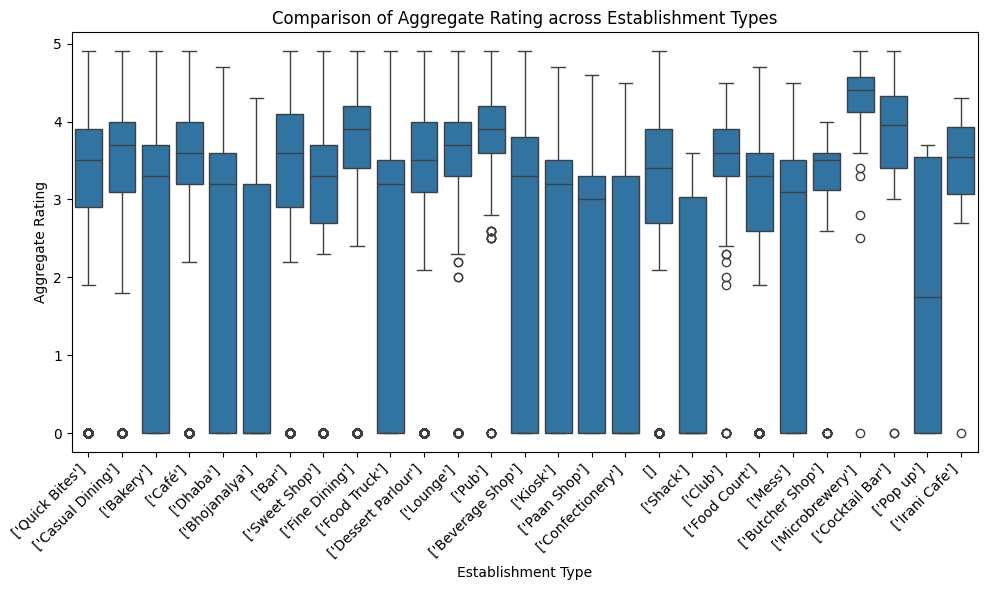

In [34]:
# Comparative Analysis: Comparing different establishment types based on aggregate rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='establishment', y='aggregate_rating')
plt.title('Comparison of Aggregate Rating across Establishment Types')
plt.xlabel('Establishment Type')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [35]:
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data['average_cost_for_two'],
    y=data['aggregate_rating'],
    z=data['votes'],
    mode='markers',
    marker=dict(
        size=8,
        color=data['votes'],  # Color by number of votes
        colorscale='Viridis',  # Choose a color scale
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Average Cost for Two',
        yaxis_title='Aggregate Rating',
        zaxis_title='Votes'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show plot
fig.show()
